## UNSEEN-open

- description of the project


### Import packages

In [1]:
##This is so variables get printed within jupyter
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

In [3]:
##import packages
import os
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import matplotlib.ticker as mticker
import regionmask

In [4]:
##We want the working directory to be the UNSEEN-open directory
pwd = os.getcwd()  ##current working directory is UNSEEN-open/Notebooks/1.Download
pwd  #print the present working directory
os.chdir(pwd + '/../')  # Change the working directory to UNSEEN-open
os.getcwd()  #print the working directory

'/lustre/soge1/projects/ls/personal/timo/UNSEEN-open/Notebooks'

'/lustre/soge1/projects/ls/personal/timo/UNSEEN-open'

## Download

We download the data from the Climate Data Store ([CDS](https://cds.climate.copernicus.eu/cdsapp#!/search?type=dataset)). 
For how to get started with CDS, see notebook [1.1 SetUp](1.Download/1.1SetUp.ipynb).#



### SEAS5
We will be using the SEAS5 hindcast, which is a dataset running from 1981-2016. The hindcast is initialized every month with 25 ensemble members and the forecast run for 6 months, indicated by blue horizontal bars below. February is forecasted by 6 initialization months (September-February). We discard the first month of the forecast because of dependence between the forecasts, explained in the evaluation section and are left with 5 initialization months (Sep-Jan) and 25 ensemble members forecasting February precipitation each year, totalling to an increase of 125 times the observed length.

For a summary of all available C3S seasonal hindcasts, their initialization months and more specifics, please see [ECMWF page](https://confluence.ecmwf.int/display/CKB/C3S+Seasonal+Forecasts) and the [SEAS5 paper](https://doi.org/10.5194/gmd-12-1087-2019).  

From CDS, we retrieve SEAS5 in notebook [1.2 Retrieve](1.Download/1.2Retrieve.ipynb) and concatenate the retrieved files in notebook [1.3 Merge](1.Download/1.3Merge.ipynb). We create a netcdf file containing the dimensions lat, lon, number (25 ensembles), time (35 years) and leadtime (5 initialization months).



![title](../graphs/Data_illustration.png)

In [6]:
SEAS5 = xr.open_dataset('../UK_example/SEAS5/SEAS5.nc')
SEAS5

<xarray.Dataset>
Dimensions:    (latitude: 11, leadtime: 5, longitude: 14, number: 25, time: 35)
Coordinates:
  * longitude  (longitude) float32 -11.0 -10.0 -9.0 -8.0 ... -1.0 0.0 1.0 2.0
  * time       (time) datetime64[ns] 1982-02-01 1983-02-01 ... 2016-02-01
  * latitude   (latitude) float32 60.0 59.0 58.0 57.0 ... 53.0 52.0 51.0 50.0
  * number     (number) int32 0 1 2 3 4 5 6 7 8 9 ... 16 17 18 19 20 21 22 23 24
  * leadtime   (leadtime) int64 2 3 4 5 6
Data variables:
    tprate     (leadtime, time, number, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-05-13 14:49:43 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

### E-OBS


In [11]:
EOBS = xr.open_dataset('../UK_example/EOBS/EOBS.nc')
EOBS

<xarray.Dataset>
Dimensions:    (latitude: 201, longitude: 464, time: 71)
Coordinates:
  * longitude  (longitude) float64 -40.38 -40.12 -39.88 ... 74.88 75.12 75.38
  * latitude   (latitude) float64 25.38 25.62 25.88 26.12 ... 74.88 75.12 75.38
  * time       (time) datetime64[ns] 1950-02-28 1951-02-28 ... 2020-02-29
Data variables:
    rr         (time, latitude, longitude) float32 ...

## Plot the 2020 event

In [22]:
EOBS2020_anomaly = EOBS.sel(time = '2020')['rr'] - EOBS.sel(time = slice('1950','2019'))['rr'].mean('time')
EOBS2020_sd_anomaly = EOBS2020_anomaly/EOBS.sel(time = slice('1950','2019'))['rr'].std('time')

EOBS2020_sd_anomaly.attrs = {'long_name': 'Monthly precipitation standardized anomaly',
 'units': '-'}

EOBS2020_sd_anomaly

<xarray.DataArray 'rr' (time: 1, latitude: 201, longitude: 464)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float64 -40.38 -40.12 -39.88 ... 74.88 75.12 75.38
  * latitude   (latitude) float64 25.38 25.62 25.88 26.12 ... 74.88 75.12 75.38
  * time       (time) datetime64[ns] 2020-02-29
Attributes:
    long_name:  Monthly precipitation standardized anomaly
    units:      -

In [20]:
['rr']-EOBS['rr'].mean('time')
EOBS2020_sd_anomaly = EOBS2020_anomaly/EOBS['rr'].std('time')

EOBS2020_sd_anomaly.attrs = {'long_name': 'Monthly precipitation standardized anomaly',
 'units': '-'}

EOBS2020_sd_anomaly

UFuncTypeError: ufunc 'subtract' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

In [23]:
EOBS2020_sd_anomaly[[1,3],:,:] ## Dont know how to select this by label?
# EOBS2020_sd_anomaly.sel(time = ['2020-02','2020-04']) ## Dont know how to select this by label?

IndexError: index 1 is out of bounds for axis 0 with size 1

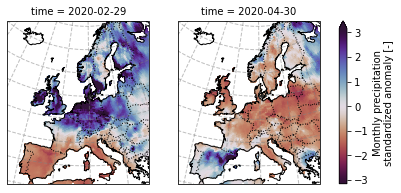

In [59]:
EOBS_plots = EOBS2020_sd_anomaly[[1,3],:,:].plot(transform=ccrs.PlateCarree(), robust = True, col='time', cmap=plt.cm.twilight_shifted_r, subplot_kws={'projection': ccrs.EuroPP()})

for ax in EOBS_plots.axes.flat:
    ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
#     ax.add_feature(cartopy.feature.OCEAN)
#     ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
#     ax.add_feature(cartopy.feature.RIVERS)                   
    ax.coastlines(resolution='50m')
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')

plt.savefig('graphs/February_April_2020_precipAnomaly.png', dpi=300)

## Load the shapefile

Regionmask has predefined countries from [Natural Earth datasets](http://www.naturalearthdata.com) (shapefiles).



In [8]:
countries = regionmask.defined_regions.natural_earth.countries_110
countries

177 'Natural Earth Countries: 110m' Regions (http://www.naturalearthdata.com)
FJ TZ WS CA US KZ UZ PG INDO AR CL DRC SO KE SD TD HT DO RUS BS FK N GL TF TL ZA LS MX UY BR BO PE CO PA CR NI HN SV GT BZ VE GY SR F EC PR J CU ZW BW NA SN ML MR BJ NE NG CM TG GH CI GN GW LR SL BF CF CG GA GQ ZM MW MZ SW AO BI IS LB MG PAL GM TN DZ J AE QA KW IRQ OM VU KH TH LA MM VN KP KR MN IND BD BT NP PK AF TJ KG TM IRN SYR ARM S BY UA PL A HU MD RO LT LV EST D BG GR TR AL HR CH L B NL P E IRL NC SB NZ AU LK CN TW I DK GB IS AZ GE PH MY BN SLO FIN SK CZ ER J PY YE SA AQ CN CY MA EG LY ET DJ SL UG RW BiH MK RS ME KO TT SS

In [9]:
SEAS5_mask = countries.mask(SEAS5.sel(leadtime=2, number=0, time='1982'),
                            lon_name='longitude',
                            lat_name='latitude')

EOBS_mask = countries.mask(EOBS.sel(time='1982'),
                           lon_name='longitude',
                           lat_name='latitude')

<ipython-input-10-f4e597050f1f>:1: UserWarning: The default value for the *approx* keyword argument to OSGB will change from True to False after 0.18.
  fig, axs = plt.subplots(1, 2, subplot_kw={'projection': ccrs.OSGB()})
/soge-home/users/cenv0732/.conda/envs/UNSEEN-open/lib/python3.8/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


/soge-home/users/cenv0732/.conda/envs/UNSEEN-open/lib/python3.8/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Text(0.5, 1.0, 'SEAS5')

Text(0.5, 1.0, 'EOBS')

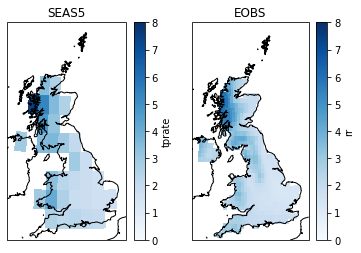

In [10]:
fig, axs = plt.subplots(1, 2, subplot_kw={'projection': ccrs.OSGB()})

SEAS5['tprate'].where(SEAS5_mask == 143).mean(
    dim=['time', 'leadtime', 'number']).where(SEAS5_mask == 143).plot(
        transform=ccrs.PlateCarree(),
        vmin=0,
        vmax=8,
        cmap=plt.cm.Blues,
        ax=axs[0])  #,cmap=plt.cm.Blues,

EOBS['rr'].where(EOBS_mask == 143).mean('time').plot(
    transform=ccrs.PlateCarree(), vmin=0, vmax=8, cmap=plt.cm.Blues, ax=axs[1])

for ax in axs.flat:
    ax.coastlines(resolution='10m')

axs[0].set_title('SEAS5')
axs[1].set_title('EOBS')
# axs[2].set_title('EOBS 2020')

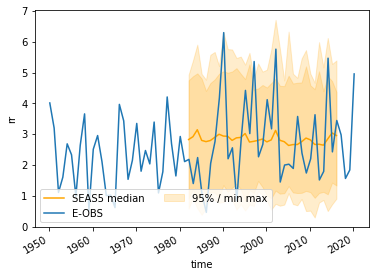

In [59]:
ax = plt.axes()

Quantiles = SEAS5['tprate'].where(SEAS5_mask == 143).mean(
    dim=['latitude', 'longitude']).quantile([0, 2.5 / 100, 0.5, 97.5 / 100, 1],
                                            dim=['number', 'leadtime'])
ax.plot(Quantiles.time,
        Quantiles.sel(quantile=0.5),
        color='orange',
        label='SEAS5 median')
ax.fill_between(Quantiles.time.values,
                Quantiles.sel(quantile=0.025),
                Quantiles.sel(quantile=0.975),
                color='orange',
                alpha=0.2,
                label='95% / min max')
ax.fill_between(Quantiles.time.values,
                Quantiles.sel(quantile=0),
                Quantiles.sel(quantile=1),
                color='orange',
                alpha=0.2)

EOBS['rr'].where(EOBS_mask == 143).mean(dim=['latitude', 'longitude']).plot(
    ax=ax, x='time', label='E-OBS')

# Quantiles_EOBS = EOBS['rr'].where(EOBS_mask == 143).mean(dim = ['latitude','longitude']).quantile([2.5/100, 0.5, 97.5/100], dim=['time'])#.plot()
# ax.plot(EOBS.time, np.repeat(Quantiles_EOBS.sel(quantile=0.5).values,71), color='blue',linestyle = '--',linewidth = 1)
# ax.plot(EOBS.time, np.repeat(Quantiles_EOBS.sel(quantile=2.5/100).values,71), color='blue',linestyle = '--',linewidth = 1)
# ax.plot(EOBS.time, np.repeat(Quantiles_EOBS.sel(quantile=97.5/100).values,71), color='blue',linestyle = '--',linewidth = 1)

plt.legend(loc='lower left', ncol=2)  #loc = (0.1, 0) upper left